2
[[ 1.28181818 -1.8021386   0.59745095 -2.43044444  1.82820834]
 [-1.35561865  1.05772531  0.02429396  2.57837064 -0.28601538]
 [-0.29773751  0.43378845 -3.8138326  -1.59526046 -0.35413731]
 [-0.17124388  0.27272363  2.48609606  1.02299685  0.72992593]
 [ 1.70072707 -1.43236169 -1.52729196  1.38846991 -0.3365128 ]]
(array([[ 3.05972452, -1.13556364, -0.71349244, -1.07640619,  1.1279666 ],
       [-0.71738486,  1.56351553, -0.40663409,  3.17182827, -2.07033777],
       [-0.30908888,  0.3222196 , -3.66425999, -2.46060126,  1.32092979],
       [ 1.13952382,  0.54627838, -0.185112  ,  1.11842474,  0.63458184],
       [ 0.88821942,  1.29612901, -2.92932643,  1.85626905, -1.11676024]]), array([[5.88865331, 5.66759478, 1.95476568, 3.48425292, 1.12844597],
       [5.84069255, 0.40685537, 2.15279016, 1.82296299, 2.09143299],
       [5.71481727, 2.15840945, 2.47272699, 0.46071272, 0.81355149],
       [5.07170868, 3.34557708, 0.96121936, 5.7747881 , 4.99531099],
       [2.47544979, 0.11514794, 1

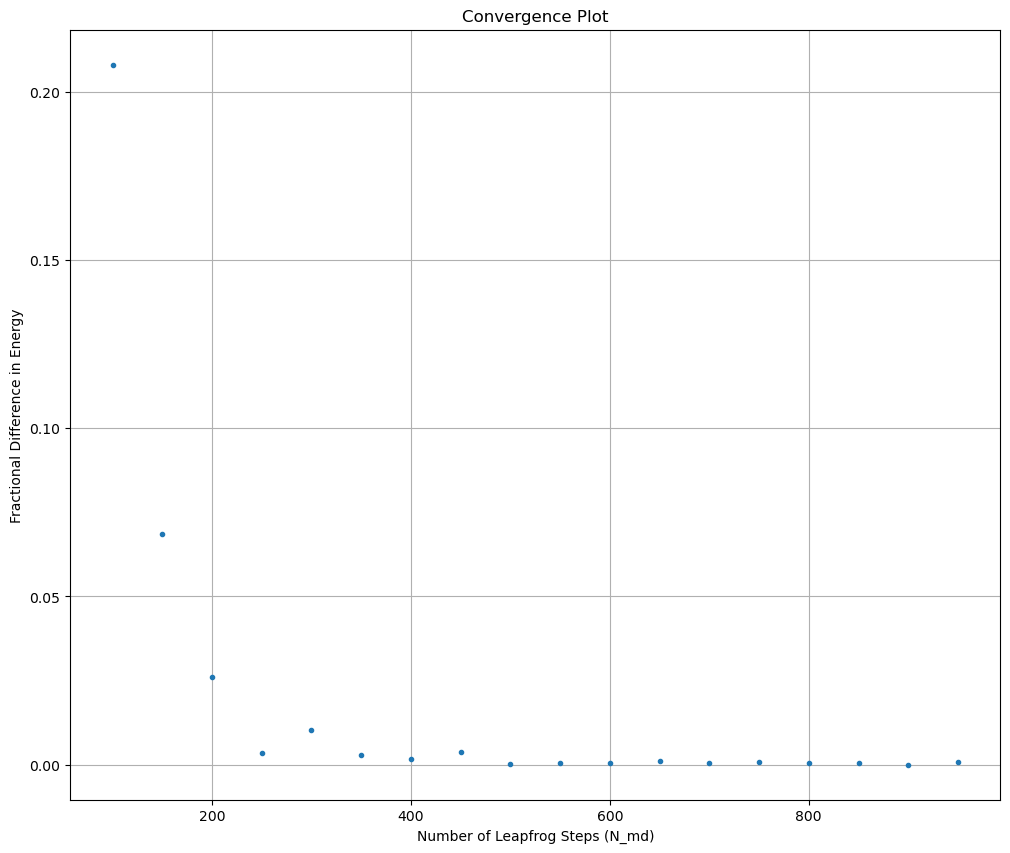

In [1]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import math
# Defining some variables

N = 5
L =  np.array([[2*np.pi*np.random.uniform() for x in range(N)] for y in range(N)]) # ask
N_md = 4
p_0 = np.random.normal(size=(N,N))
J=1
beta=1

print(np.ndim(L))
2
# Defining the Hamiltonian XY model

def Hamiltonian2D(J, L):
    Hamiltonian2D = 0.
    n = np.shape(L)[0]
    for x in range (np.shape(L)[0]):
        for y in range (np.shape(L)[0]):
            Hamiltonian2D -= J * ((np.cos(L[x, y] - L[x, (y+1)%n])) + (np.cos(L[x, y] - L[x, (y-1)%n])) 
                                  + (np.cos(L[x, y] - L[(x+1)%n, y])) + (np.cos(L[x, y] - L[(x-1)%n, y])))
    
    
    return np.array(Hamiltonian2D)/2
Hamiltonian2D(1,L)
-0.735115672079709
# Defining the artifical Hamiltonian XY model

def Hamiltonian2D_art(J, L, P, beta):
    n = np.shape(L)[0]
    Hamiltonian2D_art = sum(sum(P**2))/2 + beta*Hamiltonian2D(J, L)
    return Hamiltonian2D_art

# print(Hamiltonian2D_art(1, L, 1, 1 ))
# Defining the equations of motion

def P_dot_i_2D(J, L):
    n = np.shape(L)[0]
    P_dot_i_2D = np.zeros((n,n))

    for x in range (np.shape(L)[0]):
        for y in range (np.shape(L)[0]):
            P_dot_i_2D[x,y] -= J * ((np.sin(L[x, y] - L[x, (y+1)%n])) + (np.sin(L[x, y] - L[x, (y-1)%n])) 
                                    + (np.sin(L[x, y] - L[(x+1)%n, y])) + (np.sin(L[x, y] - L[(x-1)%n, y])))
    return P_dot_i_2D*beta
# print(P_dot_i_2D(1, L, 1, 1))

def phi_dot(P):   # confirm
    return P
            
print(P_dot_i_2D(1, L))

# Leapfrog integrator

def leapfrog_2D(N_md, p_0,J, L): 
    epsilon = 1/N_md
    p = p_0
    L_new = L
    L_new += phi_dot(p)*epsilon/2
    L_new = abs(L_new%(2*np.pi))
    for i in range(N_md-1):
        p += P_dot_i_2D(J, L)*epsilon
        L_new += phi_dot(p)*epsilon
        L_new = abs(L_new%(2*np.pi))
    
    p +=  P_dot_i_2D(J, L)*epsilon/2
    L_new -= phi_dot(p)*epsilon/2
    L_new = abs(L_new%(2*np.pi))
    return p, L_new

print(leapfrog_2D(N_md,p_0, J, L))


diff = []
range_1 =[10*i for i in range(10,100,5)]
p_0 = np.random.normal(size=(N,N))
for N_md in range_1:
   
    arr = leapfrog_2D(N_md, p_0, J,L)
    p_f = arr[0]          # We need final values of p_f and phi_f to calculate H_f
    Lat_ev = arr[1]
    H_f = Hamiltonian2D_art(J, Lat_ev, p_f, beta)
    H_0 = Hamiltonian2D_art(J, L, p_0, beta)
# dimension of L is 2 and p_0 
# The following is the quantity we want on y-axis
    diff.append(abs((H_f-H_0)/H_0)) 
    
# print(p_0)
# print(L)
# print(phi_f)

print("ini=",H_0)
print("final=",H_f)
ini= 10662.036426656732
final= 10671.118479150738
plt.figure(figsize=(12,10))
plt.xlabel('Number of Leapfrog Steps (N_md)')
plt.ylabel('Fractional Difference in Energy')
plt.title('Convergence Plot')
plt.grid()
plt.plot(range_1, diff,'.')
plt.show()

# Now we code the HMC algorithm

# Hamiltonian2D_art(J, L, P, beta)

# For me L_i == random sample


In [2]:

def markov_chain(L_i,N_cfg,N_md,beta_new,J):
    chain = []
    chain.append(L_i)
    for i in range(N_cfg):
        # Random sample
        p_hmc = np.random.normal(size=(N,N))
        new = leapfrog_2D(N_md,p_hmc, J, chain[-1]) # Integrating leapfrog algorithm
        prob = np.exp(Hamiltonian2D_art(J,chain[-1],p_hmc,beta)-Hamiltonian2D_art(J,new[1],new[0],beta))
#  Given probability distribution function defined above
        if prob > np.random.uniform(0,1):   # Accept/reject
            chain.append(new[1])  
        else:                           
            chain.append(chain[-1]) 
    return chain
# def variables(L_i, N_cfg, N_md, J, beta_new, obs):
#     chain = markov_chain(L_i,N_cfg,N_md,beta,J)
#     m = 0.0
#     E = 0.0
#     for i in range(np.shape(chain)[0]):
#         m += np.sum(L_i)
#         E += Hamiltonian2D(J,L_i)  
#     m = m/N*N
#     E = E/N*N
#     if obs == "m":
#         var = m
#     if obs == "E":
#         var = E
        
#     return var
        
#     # return m,E

def variables(L_i, N_cfg, N_md, J, beta_new):
    chain = markov_chain(L_i,N_cfg,N_md,beta_new,J)
    m = 0.0
    E = 0.0
    for i in chain:
        m += np.sum(i)
        E += Hamiltonian2D(J,i)  
    m = m/N*N
    E = E/N*N

        
    return m,E



Text(0.5, 1.0, 'm as a f(T) for N = 5')

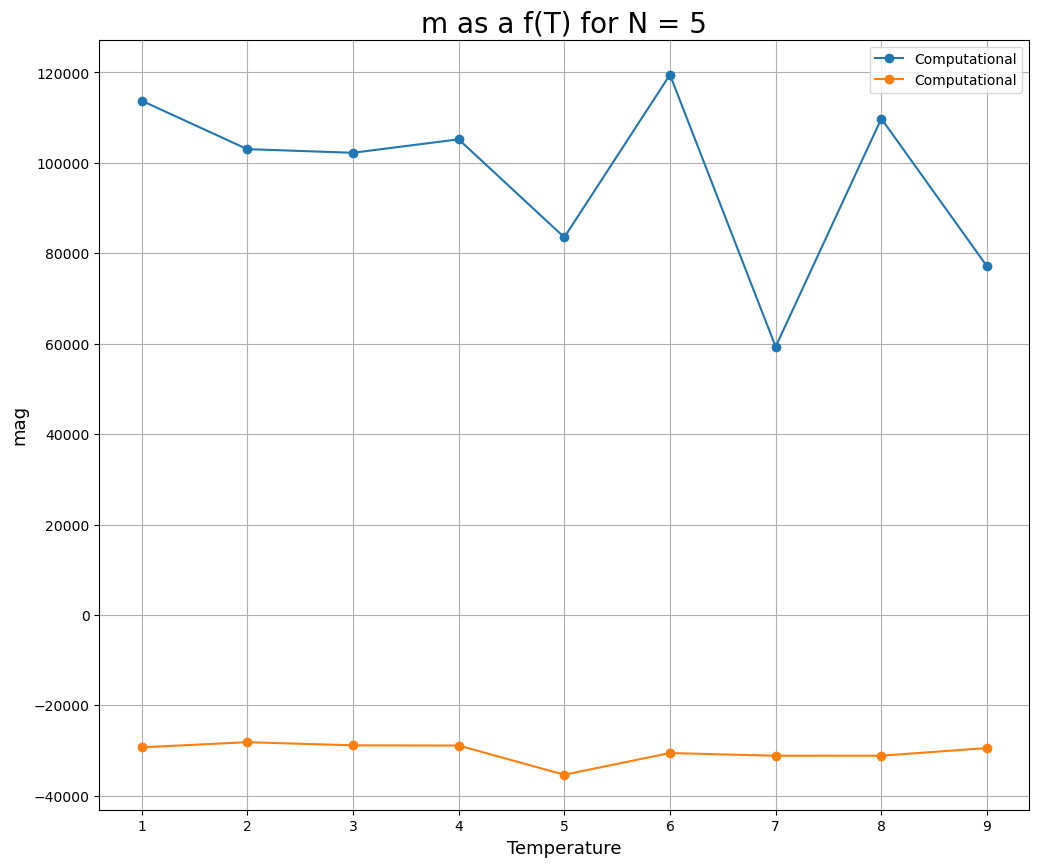

In [3]:
N_cfg = 1000
beta_range = np.arange(1,10,1) 
# beta = 1 / kb * T
L_i =  np.array([[2*np.pi*np.random.uniform() for x in range(N)] for y in range(N)]) #not sure, should be the random 
# sample but will we define it like this? if we do this then it will be the same as L but shouldnt be same right?

mag_5 = [variables(L_i, N_cfg, N_md, J, 1/i) for i in beta_range]

plt.figure(figsize = (12,10))
plt.plot(beta_range, mag_5, 'o-',label="Computational")
plt.grid()
plt.xlabel("Temperature", fontsize = 13)
plt.ylabel("mag", fontsize = 13)
plt.legend()
plt.title("m as a f(T) for N = 5", fontsize = 20 )